In [192]:
import geopandas as gpd
import numpy as np
import pandas as pd
from shapely.geometry import Polygon, Point

In [36]:
df = pd.read_csv('rt_2018.csv')

In [37]:
df

,Unnamed: 0,temp,humidity,PM25,SO2,partical,light,band1,band2,band3,band4,band5,band6,band7,dist_to_cent,tod,dss,year
0,0,27.6130,44.7610,1.031,0.000,0,16.7880,12431.666667,13346.666667,15138.333333,15609.666667,18002.333333,18244.000000,16106.666667,0.146792,905,2,2018
1,1,23.1775,76.4100,0.500,0.112,0,42.2135,10858.604167,11400.708333,12351.395833,12788.937500,14684.520833,15126.562500,13924.645833,0.160694,1265,3,2018
2,2,19.8890,82.5070,14.220,-0.188,0,54.0540,10666.125000,11290.916667,11998.750000,12526.291667,13784.875000,14593.083333,13688.333333,0.106742,1215,0,2018
3,3,27.6340,42.4955,0.797,0.000,0,1.1670,12429.625000,13341.125000,15080.750000,15566.375000,18005.500000,18236.875000,16074.375000,0.146792,645,4,2018
4,4,126.9350,100.0000,1.979,0.307,0,63.1870,10539.312500,11079.500000,11969.375000,12338.937500,13930.812500,14710.437500,13848.937500,0.052896,755,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839922,839922,126.9350,100.0000,1.270,0.139,0,8.5970,10364.250000,10904.500000,11553.250000,11857.750000,13721.500000,14185.000000,13112.500000,0.052896,425,94,2018
839923,839923,17.2730,100.0000,0.032,-0.143,0,54.7505,9888.770833,10411.541667,11762.729167,12221.500000,13864.687500,14261.541667,12940.458333,0.164218,1035,93,2018
839924,839924,25.9540,48.9140,0.456,-0.097,0,25.0870,10404.916667,10954.208333,12037.333333,12421.166667,13484.875000,14741.291667,13607.250000,0.118475,1045,92,2018
839925,839925,22.4645,73.9320,2.323,0.039,0,12.7880,8300.833333,8193.500000,8192.500000,7772.833333,7687.500000,7392.666667,7187.166667,0.143288,325,90,2018


In [65]:
sensor = pd.read_csv('node_with_doc.csv')

In [130]:
dist_key = list(set(list(df['dist_to_cent'])))
sensor_doc = list(sensor['dist_to_cent'])
data = []
for i in range(0, 78):
    df_doc = dist_key[i]
    x = min(sensor_doc, key=lambda x:abs(x-df_doc))
    lat = list(sensor[sensor["dist_to_cent"]==x]['lat'])[0]
    lon = list(sensor[sensor["dist_to_cent"]==x]['lon'])[0]
    #print(x)
    #print(df_doc)
    #print(" ")
    data.append([df_doc, lat, lon])

In [131]:
df_join_sensor = pd.DataFrame(data, columns=['dist_to_cent', 'lat', 'lon'])

In [92]:
df_input = pd.merge(df, df_join_sensor, on='dist_to_cent', how='left')

In [93]:
df_input

,Unnamed: 0,temp,humidity,PM25,SO2,partical,light,band1,band2,band3,band4,band5,band6,band7,dist_to_cent,tod,dss,year,lat,lon
0,0,27.6130,44.7610,1.031,0.000,0,16.7880,12431.666667,13346.666667,15138.333333,15609.666667,18002.333333,18244.000000,16106.666667,0.146792,905,2,2018,41.751142,-87.712990
1,1,23.1775,76.4100,0.500,0.112,0,42.2135,10858.604167,11400.708333,12351.395833,12788.937500,14684.520833,15126.562500,13924.645833,0.160694,1265,3,2018,41.722044,-87.604482
2,2,19.8890,82.5070,14.220,-0.188,0,54.0540,10666.125000,11290.916667,11998.750000,12526.291667,13784.875000,14593.083333,13688.333333,0.106742,1215,0,2018,41.895005,-87.745817
3,3,27.6340,42.4955,0.797,0.000,0,1.1670,12429.625000,13341.125000,15080.750000,15566.375000,18005.500000,18236.875000,16074.375000,0.146792,645,4,2018,41.751142,-87.712990
4,4,126.9350,100.0000,1.979,0.307,0,63.1870,10539.312500,11079.500000,11969.375000,12338.937500,13930.812500,14710.437500,13848.937500,0.052896,755,7,2018,41.831070,-87.617298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839922,839922,126.9350,100.0000,1.270,0.139,0,8.5970,10364.250000,10904.500000,11553.250000,11857.750000,13721.500000,14185.000000,13112.500000,0.052896,425,94,2018,41.831070,-87.617298
839923,839923,17.2730,100.0000,0.032,-0.143,0,54.7505,9888.770833,10411.541667,11762.729167,12221.500000,13864.687500,14261.541667,12940.458333,0.164218,1035,93,2018,41.714494,-87.643099
839924,839924,25.9540,48.9140,0.456,-0.097,0,25.0870,10404.916667,10954.208333,12037.333333,12421.166667,13484.875000,14741.291667,13607.250000,0.118475,1045,92,2018,41.768319,-87.683396
839925,839925,22.4645,73.9320,2.323,0.039,0,12.7880,8300.833333,8193.500000,8192.500000,7772.833333,7687.500000,7392.666667,7187.166667,0.143288,325,90,2018,41.736314,-87.624179


In [173]:
curr_dss = 0
df_day = df_input[df_input['dss']==curr_dss]
df_day_11 = df_day[df_day["tod"]>60*(11+5)]
df_day_11_13 = df_day_11[df_day_11["tod"]<60*(13+5)]
df_day_11_13
data = []
index_list = list(set(list(df_day_11_13["dist_to_cent"])))


data = []
for index in index_list:
    curr_df_sensor = df_day_11_13[df_day_11_13['dist_to_cent']==index]
    lat = list(curr_df_sensor["lat"])[0]
    lon = list(curr_df_sensor["lon"])[0]
    curr_df_sensor = df_day_11_13[df_day_11_13['dist_to_cent']==index]
    temp_avg = sum(list(curr_df_sensor["temp"])) / len(list(curr_df_sensor["temp"]))
    humidity_avg = sum(list(curr_df_sensor["humidity"])) / len(list(curr_df_sensor["humidity"]))
    PM25_avg = sum(list(curr_df_sensor["PM25"])) / len(list(curr_df_sensor["PM25"]))
    light_avg = sum(list(curr_df_sensor["light"])) / len(list(curr_df_sensor["light"]))
    band1_avg = sum(list(curr_df_sensor["band1"])) / len(list(curr_df_sensor["band1"]))
    band2_avg = sum(list(curr_df_sensor["band2"])) / len(list(curr_df_sensor["band2"]))
    band3_avg = sum(list(curr_df_sensor["band3"])) / len(list(curr_df_sensor["band3"]))
    band4_avg = sum(list(curr_df_sensor["band4"])) / len(list(curr_df_sensor["band4"]))
    band5_avg = sum(list(curr_df_sensor["band5"])) / len(list(curr_df_sensor["band5"]))
    band6_avg = sum(list(curr_df_sensor["band6"])) / len(list(curr_df_sensor["band6"]))
    band7_avg = sum(list(curr_df_sensor["band7"])) / len(list(curr_df_sensor["band7"]))
    data.append([temp_avg, humidity_avg, PM25_avg, light_avg, band1_avg, band2_avg, band3_avg, band4_avg, band5_avg, band6_avg, band7_avg, lat, lon, curr_dss])
final_df = pd.DataFrame(data, columns=['temp', 'humidity', 'PM25', 'light', 'band1', 'band2', 'band3', 'band4', 'band5', 'band6', 'band7','lat', 'lon', 'dss'])
final_df
#for index in index_list:
#    curr_df = df_day_11_13[df_day_11_13['dist_to_cent']==index]

,temp,humidity,PM25,light,band1,band2,band3,band4,band5,band6,band7,lat,lon,dss
0,19.673875,70.291250,13.824167,55.580750,11314.916667,11703.833333,13743.666667,14138.833333,17028.333333,16558.583333,13927.708333,41.913583,-87.682414,0
1,19.670542,68.713917,13.588833,25.253083,9739.583333,10280.500000,11286.250000,11414.166667,15445.500000,14083.083333,12610.458333,41.736495,-87.614529,0
2,22.765750,40.482417,9.926667,54.753458,10935.583333,11270.875000,12420.333333,12504.166667,17786.583333,16149.541667,13719.208333,41.838618,-87.607817,0
3,19.943458,77.472833,15.023833,79.649792,9862.166667,10312.625000,11315.333333,11550.625000,13867.166667,13758.625000,12703.250000,41.808594,-87.665048,0
4,19.741125,89.323833,10.264083,68.249583,11955.583333,12760.125000,13990.583333,14707.083333,17148.708333,17261.458333,15580.208333,41.896157,-87.662391,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,27.364000,43.809000,18.940750,12.723500,14761.666667,15546.500000,17255.208333,17740.583333,23314.500000,18995.208333,14795.791667,41.793278,-87.600117,0
69,24.058042,69.573000,16.029667,36.644625,10983.625000,11130.416667,12163.708333,11797.416667,19848.958333,14543.083333,11827.625000,41.791329,-87.598677,0
70,19.976125,90.436250,13.902917,55.976458,9604.625000,9957.625000,10797.791667,10882.125000,14537.666667,13128.500000,11664.708333,41.882304,-87.671773,0
71,19.356542,82.463667,14.068333,53.942708,10666.125000,11290.916667,11998.750000,12526.291667,13784.875000,14593.083333,13688.333333,41.895005,-87.745817,0


In [182]:
data = []
for i in range(0, 95):
    curr_dss = i
    df_day = df_input[df_input['dss']==curr_dss]
    ## CDT
    df_day_11 = df_day[df_day["tod"]>60*(11+5)]
    df_day_11_13 = df_day_11[df_day_11["tod"]<60*(13+5)]
    df_day_11_13
    index_list = list(set(list(df_day_11_13["dist_to_cent"])))

    for index in index_list:
        curr_df_sensor = df_day_11_13[df_day_11_13['dist_to_cent']==index]
        lat = list(curr_df_sensor["lat"])[0]
        lon = list(curr_df_sensor["lon"])[0]
        curr_df_sensor = df_day_11_13[df_day_11_13['dist_to_cent']==index]
        temp_avg = sum(list(curr_df_sensor["temp"])) / len(list(curr_df_sensor["temp"]))
        humidity_avg = sum(list(curr_df_sensor["humidity"])) / len(list(curr_df_sensor["humidity"]))
        PM25_avg = sum(list(curr_df_sensor["PM25"])) / len(list(curr_df_sensor["PM25"]))
        light_avg = sum(list(curr_df_sensor["light"])) / len(list(curr_df_sensor["light"]))
        band1_avg = sum(list(curr_df_sensor["band1"])) / len(list(curr_df_sensor["band1"]))
        band2_avg = sum(list(curr_df_sensor["band2"])) / len(list(curr_df_sensor["band2"]))
        band3_avg = sum(list(curr_df_sensor["band3"])) / len(list(curr_df_sensor["band3"]))
        band4_avg = sum(list(curr_df_sensor["band4"])) / len(list(curr_df_sensor["band4"]))
        band5_avg = sum(list(curr_df_sensor["band5"])) / len(list(curr_df_sensor["band5"]))
        band6_avg = sum(list(curr_df_sensor["band6"])) / len(list(curr_df_sensor["band6"]))
        band7_avg = sum(list(curr_df_sensor["band7"])) / len(list(curr_df_sensor["band7"]))
        data.append([temp_avg, humidity_avg, PM25_avg, light_avg, band1_avg, band2_avg, band3_avg, band4_avg, band5_avg, band6_avg, band7_avg, lat, lon, curr_dss])
final_df = pd.DataFrame(data, columns=['temp', 'humidity', 'PM25', 'light', 'band1', 'band2', 'band3', 'band4', 'band5', 'band6', 'band7','lat', 'lon', 'dss'])
final_df

,temp,humidity,PM25,light,band1,band2,band3,band4,band5,band6,band7,lat,lon,dss
0,19.673875,70.291250,13.824167,55.580750,11314.916667,11703.833333,13743.666667,14138.833333,17028.333333,16558.583333,13927.708333,41.913583,-87.682414,0
1,19.670542,68.713917,13.588833,25.253083,9739.583333,10280.500000,11286.250000,11414.166667,15445.500000,14083.083333,12610.458333,41.736495,-87.614529,0
2,22.765750,40.482417,9.926667,54.753458,10935.583333,11270.875000,12420.333333,12504.166667,17786.583333,16149.541667,13719.208333,41.838618,-87.607817,0
3,19.943458,77.472833,15.023833,79.649792,9862.166667,10312.625000,11315.333333,11550.625000,13867.166667,13758.625000,12703.250000,41.808594,-87.665048,0
4,19.741125,89.323833,10.264083,68.249583,11955.583333,12760.125000,13990.583333,14707.083333,17148.708333,17261.458333,15580.208333,41.896157,-87.662391,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5808,19.911167,55.792583,0.731250,53.974625,10669.500000,11381.250000,12002.000000,12646.000000,15201.000000,15433.500000,13794.500000,41.839066,-87.665685,94
5809,126.935000,100.000000,1.195083,47.316958,10364.250000,10904.500000,11553.250000,11857.750000,13721.500000,14185.000000,13112.500000,41.831070,-87.617298,94
5810,20.614958,67.263667,2.568333,56.387583,9814.250000,10046.500000,10844.500000,10910.000000,13529.750000,12741.500000,11575.750000,41.882304,-87.671773,94
5811,19.495833,57.968208,0.643833,54.665250,10412.500000,10611.250000,11639.000000,11781.000000,14466.250000,14576.500000,13227.500000,41.921405,-87.677766,94


In [183]:
final_df_2 = final_df[final_df['temp']< 50]

In [186]:
final_df_2.to_csv('2018_result_aggregate.csv')  

In [187]:
final_df_2

,temp,humidity,PM25,light,band1,band2,band3,band4,band5,band6,band7,lat,lon,dss
0,19.673875,70.291250,13.824167,55.580750,11314.916667,11703.833333,13743.666667,14138.833333,17028.333333,16558.583333,13927.708333,41.913583,-87.682414,0
1,19.670542,68.713917,13.588833,25.253083,9739.583333,10280.500000,11286.250000,11414.166667,15445.500000,14083.083333,12610.458333,41.736495,-87.614529,0
2,22.765750,40.482417,9.926667,54.753458,10935.583333,11270.875000,12420.333333,12504.166667,17786.583333,16149.541667,13719.208333,41.838618,-87.607817,0
3,19.943458,77.472833,15.023833,79.649792,9862.166667,10312.625000,11315.333333,11550.625000,13867.166667,13758.625000,12703.250000,41.808594,-87.665048,0
4,19.741125,89.323833,10.264083,68.249583,11955.583333,12760.125000,13990.583333,14707.083333,17148.708333,17261.458333,15580.208333,41.896157,-87.662391,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5807,22.987833,18.297208,2.055083,56.663083,10500.000000,10774.000000,11311.500000,11620.000000,16362.750000,14566.500000,12464.000000,41.838618,-87.607817,94
5808,19.911167,55.792583,0.731250,53.974625,10669.500000,11381.250000,12002.000000,12646.000000,15201.000000,15433.500000,13794.500000,41.839066,-87.665685,94
5810,20.614958,67.263667,2.568333,56.387583,9814.250000,10046.500000,10844.500000,10910.000000,13529.750000,12741.500000,11575.750000,41.882304,-87.671773,94
5811,19.495833,57.968208,0.643833,54.665250,10412.500000,10611.250000,11639.000000,11781.000000,14466.250000,14576.500000,13227.500000,41.921405,-87.677766,94


In [188]:
shapefile = gpd.read_file("./geo/geo_export_5bb8636f-65b7-450a-8fd9-7f01027fd84b.shp")
chicago_shape = shapefile["geometry"][0]

In [204]:

## Generate raster based about 1 km spatial resoltuion
## one Degree latitude = 111 km
## In chicago, where latitude = 41.881832, one Degree longitude = 82 km
## We use this estimation for the following ananlsis
## This work as the city of Chicago is small
lat_start = 41.05
lon_start = -87.96

incre_lat = 1/111
incre_lon = 1/82

lat_end = 42.05
lon_end = -87.5

raster = []
is_in_chicago = []

lat = lat_start

while(lat<lat_end):
    lon = lon_start
    curr_raster = []
    curr_is_in_chicago = []
    while(lon<lon_end):
        curr_point = Point(lon, lat)
        if (curr_point.within(chicago_shape)):
            curr_is_in_chicago.append(1)
        else:
            curr_is_in_chicago.append(0)
        curr_raster.append([lon, lat])
        lon = lon+incre_lon
    raster.append(curr_raster)
    is_in_chicago.append(curr_is_in_chicago)
    lat = lat+incre_lat

In [217]:
def IDW(target_lon, target_lat, val_list, lon_lst, lat_lst):



    up = 0
    down = 0
    IDW = 0
    
    for i in range(0, len(lon_lst)):
        curr_lon = lon_lst[i]
        curr_lat = lat_lst[i]
        curr_val = val_list[i]
        
        distx = (curr_lon - target_lon)*82
        disty = (curr_lat - target_lat)*111
        
        w = 1/np.sqrt(distx*distx+disty*disty)
        down = down+w
        up = up+w*curr_val
    rt = up/down
    return rt

In [243]:
data = np.zeros((112, 38, 11, 95))
for dss in range(0, 95):
    print(dss)
    df_current_date = final_df_2[final_df_2['dss']==dss]
    for x in range(0, 112):
        for y in range(0, 38):
            #if (is_in_chicago[x][y]==0):
            #    pass
            #else:
            curr_coord = raster[x][y]
            lon = curr_coord[0]
            lat = curr_coord[1]
            temp_ = IDW(lon, lat, list(df_current_date["temp"]), list(df_current_date["lon"]),list(df_current_date["lat"]))
            humidity_ = IDW(lon, lat, list(df_current_date["humidity"]), list(df_current_date["lon"]),list(df_current_date["lat"]))
            PM25_ = IDW(lon, lat, list(df_current_date["PM25"]), list(df_current_date["lon"]),list(df_current_date["lat"]))
            light_ = IDW(lon, lat, list(df_current_date["light"]), list(df_current_date["lon"]),list(df_current_date["lat"]))     
            band1_ = IDW(lon, lat, list(df_current_date["band1"]), list(df_current_date["lon"]),list(df_current_date["lat"]))
            band2_ = IDW(lon, lat, list(df_current_date["band2"]), list(df_current_date["lon"]),list(df_current_date["lat"]))
            band3_ = IDW(lon, lat, list(df_current_date["band3"]), list(df_current_date["lon"]),list(df_current_date["lat"]))
            band4_ = IDW(lon, lat, list(df_current_date["band4"]), list(df_current_date["lon"]),list(df_current_date["lat"]))
            band5_ = IDW(lon, lat, list(df_current_date["band5"]), list(df_current_date["lon"]),list(df_current_date["lat"]))
            band6_ = IDW(lon, lat, list(df_current_date["band6"]), list(df_current_date["lon"]),list(df_current_date["lat"]))
            band7_ = IDW(lon, lat, list(df_current_date["band7"]), list(df_current_date["lon"]),list(df_current_date["lat"]))
            data[x][y][0][dss]=temp_
            data[x][y][1][dss]=humidity_
            data[x][y][2][dss]=PM25_
            data[x][y][3][dss]=light_
            data[x][y][4][dss]=band1_
            data[x][y][5][dss]=band2_
            data[x][y][6][dss]=band3_
            data[x][y][7][dss]=band4_
            data[x][y][8][dss]=band5_
            data[x][y][9][dss]=band6_
            data[x][y][10][dss]=band7_


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94


In [244]:
np.save("real_data.npy", data)

In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
from shapely.geometry import Polygon, Point

In [4]:
data = np.load('real_data.npy')

In [27]:
x = data[:,:,0,:].flat

In [28]:
x2 = list(x)

In [29]:
x2

[19.955353911311594,
 17.83531012987369,
 25.573543187753845,
 24.879700275696244,
 23.818627867433097,
 26.06972945692548,
 24.24024560195342,
 29.82373058759132,
 33.881285430003544,
 34.99844650170305,
 33.60285198380984,
 26.3384085506519,
 31.028569291637016,
 32.86547838486544,
 34.12416315494992,
 24.374782783515204,
 26.007658122451428,
 29.356780595188138,
 32.79653182624453,
 29.090115577175425,
 30.066015610284612,
 31.355604086866148,
 32.72822879116276,
 26.594472830163713,
 32.53689502550331,
 32.6351662950529,
 27.653887394698618,
 25.813578436556117,
 30.10792327010579,
 25.042689250425195,
 22.99627387560212,
 24.059755217116432,
 26.622490972266185,
 28.43764162313331,
 30.768469003021558,
 28.55646735742576,
 25.706828149587594,
 27.53404297397803,
 28.304301074205537,
 26.952388298819955,
 27.406829780717917,
 30.476602489738262,
 30.759163222544796,
 28.683512975464282,
 35.90034374809083,
 32.939587364633525,
 26.202937774189124,
 30.05857820665277,
 26.9129324488

(array([2.24912931e-05, 0.00000000e+00, 6.74738792e-05, 0.00000000e+00,
        2.69895517e-04, 6.29756206e-04, 2.49653353e-03, 4.47576732e-03,
        8.43423490e-03, 7.46710930e-03, 7.05102038e-02, 8.52420007e-02,
        5.10552353e-03, 3.26123749e-03, 1.46193405e-03, 6.29756206e-04,
        4.27334568e-04, 2.47404224e-04, 1.34947758e-04, 1.79930344e-04,
        8.99651722e-05, 2.24912931e-05, 1.34947758e-04, 3.37369396e-04,
        7.42212671e-04, 2.20414672e-03, 4.22836310e-03, 7.15223119e-03,
        7.87195257e-03, 5.92420659e-02, 8.63890567e-02, 1.67560133e-02,
        6.09514042e-03, 4.11590663e-03, 8.77160429e-03, 5.75552189e-02,
        1.62162223e-02, 6.74738792e-03, 2.92386810e-03, 2.06919896e-03,
        3.28372879e-03, 5.60033197e-03, 2.05570419e-02, 4.71417503e-02,
        8.95603290e-02, 1.62387136e-02, 7.62454835e-03, 1.85553168e-02,
        6.99254301e-02, 3.05881586e-03, 2.56400741e-03, 1.79930344e-03,
        3.46365913e-03, 1.05933990e-02, 7.64029225e-02, 8.546691

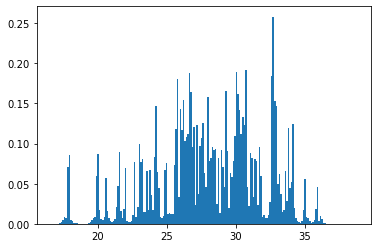

In [34]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
np.random.seed(42)
x = np.random.normal(size=100)

plt.hist(x2, density=True, bins=200)